# <Fast text를 이용한 유사도 계산>

In [1]:
import gzip

## - 필요한 모듈 import

In [2]:
from gensim import models
ko_model = models.fasttext.load_facebook_model('cc.ko.300.bin.gz')
from sklearn.decomposition import PCA
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Okt
import nltk

## - 새로운 글 & 기존 글(상위 5개) 토큰 사이 유사도 검사 
### 1. 데이터 불러오기

In [3]:
data = pd.read_excel('last_petition_datacrawling.xlsx')[['제목', '청원수', '본문']]
okt = Okt()

delete_word = ['현재', '지금', '상반기', '하반기', '이', '그', '그녀', '저', '것', '들', '제', '저희', '너', '되', '물', '수', '않', '없', '아니',
               '때문', '곳', '등', '들', '중', '좀', '잘', '더', '더욱', '경우', '후', '때', '있', '하', '생각', '청원', '국민청원']

final_token = []
new_final_token = []
df = pd.DataFrame(columns=['청원글', '청원수', '상위토큰', '유사도'])

### 2. 인풋 받기

In [5]:
# 인풋
new_petition = okt.nouns(input("새로 청원할 글을 입력하세요: "))

새로 청원할 글을 입력하세요: 코로나19 확진자가 전날보다 34명 증가했다고 합니다. 코로나 방지를 위해 외국인 입국 금지시켜주세요.  이처럼 최근 다시 코로나 확진자가 늘어나고 있는 상황입니다. 해외 유입 외국인을 계속 받으니까 지역사회 감염자가 늘어나는 것 아닙니까? 수개월 동안의 의료진과 국민들의 노력과 시간이 모두 수포로 돌아가는 것 같아 짜증나네요. 우리나라 국적인 사람들은 어쩔 수 없다고 해도, 해외 국적인 외국인들까지 계속 입국을 허용하는 것은 이와 같은 코로나 사태 해결에 도움이 안된다고 생각합니다. 외국인 입국 금지 강력히 원합니다. 


### 3. 새로운 청원글 토큰화

In [6]:
# 새로운 청원글 토큰화
new_text = nltk.Text(new_petition)
new_selected_words = [f[0] for f in new_text.vocab().most_common(15)]
print(new_selected_words)

# 새로운 청원글 불용어 제거
for word in new_selected_words:
    if word not in delete_word:
        new_final_token.append(word)
        
new_final_token = new_final_token[:5]


['코로나', '외국인', '입국', '것', '확', '진자', '금지', '해외', '계속', '국적', '전날', '명', '증가', '방지', '위해']


In [7]:
new_final_token

['코로나', '외국인', '입국', '확', '진자']

### 4. 기존 청원글 토큰화
### 5. 제목이랑 본문상위토큰 합치기
### 6. 불용어 제거하기 -> 5개 최종 토큰만 추출하여 final_token에 저장
### 7. 새로운 글 & 기존의 청원글과 자카드 유사도 검사

In [8]:
# 3. 기존 청원글 토큰화

# for i in range(10):
for i in range(data['제목'].count()):
    # 제목 토큰
    title_token = okt.nouns(data['제목'][i])
    # 콘텐트 토큰
    content_token = okt.nouns(data['본문'][i])
    text = nltk.Text(content_token)
    # 출현 빈도가 높은 본문 상위 토큰 15개
    selected_words = [f[0] for f in text.vocab().most_common(15)]
    
# 4. 제목이랑 본문상위토큰 15개 합치기
    hap_token = title_token + selected_words
#     print("제목 토큰 & 본문에서 가장 많이 나온 명사 15개: \n", hap_token)
    
# 5. 불용어 제거하기
    for word in hap_token:
        if word not in delete_word:
            final_token.append(word)
            
# 5-2. 불용어 제거한 후, 5개 토큰만 추출
    final_token = final_token[:5]
#     print("불용어 제거한 최종 토큰: \n", final_token)
    

#     print("-" * 50)
    
# 6. 새로운 글 & 기존의 청원글과 자카드 유사도 검사
    def Jaccard_similarity(existing, new):
        # 중복되는 단어 제거
        existing = set(existing)
        new = set(new)
        return len(existing & new) / len(existing | new)

    # 기존의 모든 청원글과 새로운 청원글의 자카드 유사도 출력
#     print('"' + data['제목'][i] + '"' + " 청원글과의 유사도: ", Jaccard_similarity(final_token, new_final_token))
#     print("-" * 50)

    df = df.append({'청원글':data['제목'][i], '청원수': data['청원수'][i], 
                    '상위토큰': final_token, '유사도':Jaccard_similarity(final_token, new_final_token)}, 
                   ignore_index=True)
    final_token = []

### 8. sorting된 순서로 자카드 유사도 가장 높은 상위 5개 글 제시 

In [9]:
sorted_df = df.sort_values(by = ['유사도'], axis = 0, ascending=False, inplace=False)  # 유사도 기준 내림차순으로 정렬
sorted_petition = sorted_df.iloc[:5]  # 상위 5개 글 추출 

# 자카드 유사도가 가장 높은 상위 5개 청원글 출력
print("자카드 유사도가 가장 높은 상위 5개 청원글: \n", sorted_petition)  # 제목과 청원수, 상위토큰, 유사도 나옴.

자카드 유사도가 가장 높은 상위 5개 청원글: 
                                             청원글   청원수                    상위토큰  \
2625                              외국인 입국금지 바랍니다  2839  [외국인, 입국, 금지, 입국, 코로나]   
4313                               코로나 계엄령 선포하라   503   [코로나, 계엄령, 선포, 확, 진자]   
3079                      세종시청 코로나 확진자동선 무의미 알림  3351    [세종, 시청, 코로나, 확, 진자]   
4168  코로나19 일반 확진자와 신천지 관련 확진자와 구분해서 집계, 방송해주세요   458   [코로나, 일반, 확, 진자, 신천지]   
3139                안성시는 코로나 확진자 동선을 제대로 공개하주세요  2219   [안성시, 코로나, 확, 진자, 동선]   

           유사도  
2625  0.500000  
4313  0.428571  
3079  0.428571  
4168  0.428571  
3139  0.428571  


### 9. 유사도 그래프 

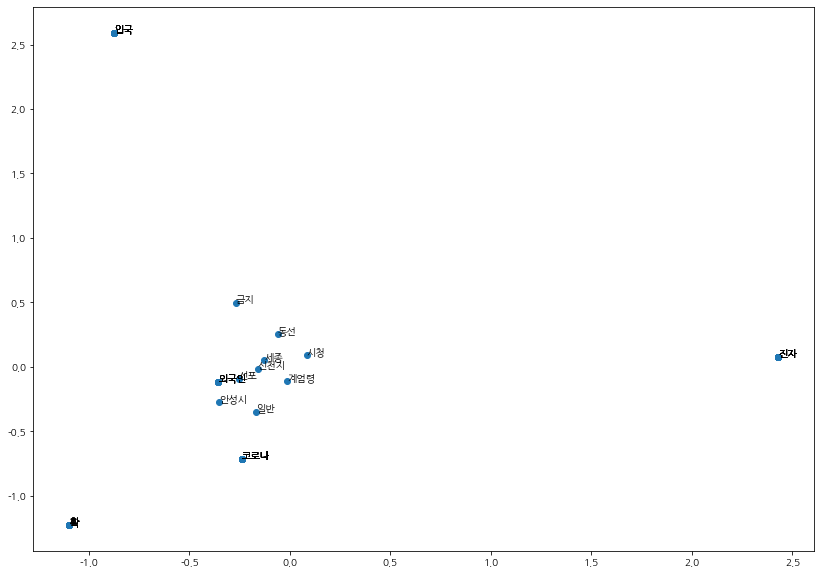

In [10]:
words = []

# 그래프
for i in range(5):
    words += sorted_petition.iloc[i].iloc[2] + new_final_token # 기존 글 다섯개 토큰 + 새로운 글 다섯개 토큰
    
pca = PCA(n_components=2)
xys = pca.fit_transform([ko_model.wv.word_vec(w) for w in words])
xs = xys[:,0]
ys = xys[:,1]

mpl.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지
plt.rc('font', family = 'NanumGothic')   #나눔고딕을 기본 글꼴로 설정
plt.figure(figsize=(14, 10), )
plt.scatter(xs, ys, marker='o')
for i, v in enumerate(words):
    plt.annotate(v, xy=(xs[i], ys[i]))

### 10. 새로운 청원글 & 기존 청원글 상위토큰(단어) 1:1 유사도 검사

In [11]:
# 새로운 청원글의 상위토큰: new_final_token
# 기존 청원글 5개의 상위 토큰: sorted_petition['상위토큰']
prediction = 0
similarity_rate = 0
similarity_rate_hap = 0

In [12]:
for i in range(5):   # 5개의 기존 청원글
    for k in range(5): # 5개의 상위토큰           
        similarity_rate = ko_model.wv.similarity(new_final_token[k], sorted_petition.iloc[i].iloc[2][k]) # 1:1 유사도
#         print(similarity_rate)

# <유사도 기반 청원수 예측>

In [13]:
numerator = 0
denominator = 0

for i in range(5):   # 5개의 기존 청원글
    for k in range(5): # 5개의 상위토큰           
        similarity_rate = ko_model.wv.similarity(new_final_token[k], sorted_petition.iloc[i].iloc[2][k]) # 1:1 유사도
        similarity_rate_hap += similarity_rate
    similarity_rate_mean = similarity_rate_hap / 5   # 상위토큰 5개의 유사도 평균
    
    weighted_petition_number = similarity_rate_mean * sorted_petition.iloc[i].iloc[1] # 유사도*청원수
    numerator += weighted_petition_number  # 분자(유사도*청원수 총합)
    denominator += similarity_rate  # 분모(유사도 총합) 
    
final_prediction = numerator/denominator
print("예상 청원수: ", final_prediction)

예상 청원수:  4287.382278310223
